<a href="https://colab.research.google.com/github/ceydanurilhan/object-detection/blob/main/image_object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

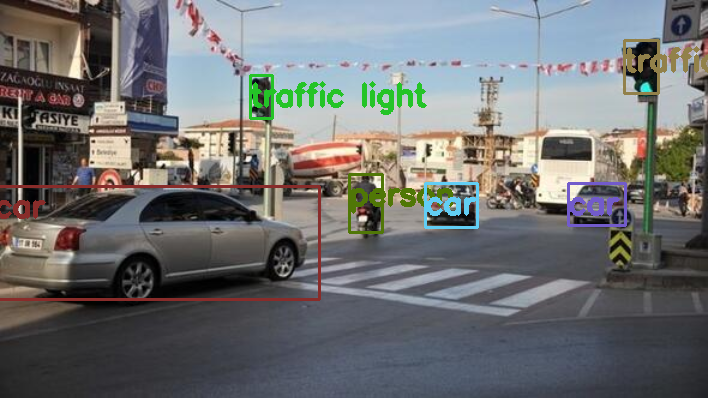

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

#LOAD YOLO
net = cv2.dnn.readNet("yolov3.weights","yolov3.cfg")
classes = []
with open("coco.names","r") as f:
  classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0]-1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0,255, size = (len(classes),3))

#LOADING IMAGE
img = cv2.imread("ckale.jpg") 
img = cv2.resize(img, None, fx=1.2, fy=1.2)
height, width, channels = img.shape

#DETECTING OBJECTS
blob = cv2.dnn.blobFromImage(img, 0.00392, (416,416), (0,0,0), True, crop=False)


net.setInput(blob) 
outs = net.forward(output_layers)   

#SHOWING INFORMATIONS ON THE SCREEN
class_ids = []
confidences = [] 
boxes = []
for out in outs:
  for detection in out:
    scores = detection[5:]
    class_id = np.argmax(scores)
    confidence = scores [class_id]
    if confidence > 0.5:
       #object detected
      center_x = int(detection[0] * width)
      center_y = int(detection[1] * height)
      w = int(detection[2] * width)
      h = int(detection[3] * height)

      #rectangle coordinates
      x = int(center_x - w / 2) 
      y = int(center_y - h / 2) 

      boxes.append([x,y,w,h,])
      confidences.append(float(confidence))
      class_ids.append(class_id)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5,0,4)

font = cv2.FONT_HERSHEY_SIMPLEX
for i in range(len(boxes)):
  if i in indexes : 
    x,y,w,h = boxes[i]
    label = classes[class_ids[i]]
    color = colors[i]
    cv2.rectangle(img, (x,y), (x+w, y+h), color,2)
    cv2.putText(img,label,(x,y+30),font,1,color,3)


cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()
